In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from src.helpers.data import load_data_to_dataframe, get_data_for_department_business
from src.helpers.computations import get_average, get_weekly_mean
from src.models.enums import MeanType
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [20]:
look_back_time = 50
predictiing_time = 51

In [21]:
# Load the train data

trainig_data_frame = load_data_to_dataframe(Path("training_data/train.parquet"))
print(trainig_data_frame.head())
# print("data type and information of the training_data_frame", trainig_data_frame.info())
trainig_data_frame["day_id"] = pd.to_datetime(trainig_data_frame["day_id"])
# print("data type and information of the training_data_frame", trainig_data_frame.info())
bu_feat_data = load_data_to_dataframe(Path("training_data/bu_feat.parquet"))
# print(bu_feat_data.head())
testing_data = load_data_to_dataframe(Path("testing_data/test.parquet"))

       day_id  but_num_business_unit  dpt_num_department     turnover
0  2017-09-30                     64                 127   580.308443
1  2017-09-30                    119                 127  1512.995918
2  2017-09-30                      4                  88   668.593556
3  2017-09-30                    425                 127     0.000000
4  2017-09-30                    513                  73     0.000000


      day_id     turnover
0 2012-12-30   723.618419
1 2013-01-06   407.020943
2 2013-01-13  1092.668252
3 2013-01-20  1870.674488
4 2013-01-27  1060.709341


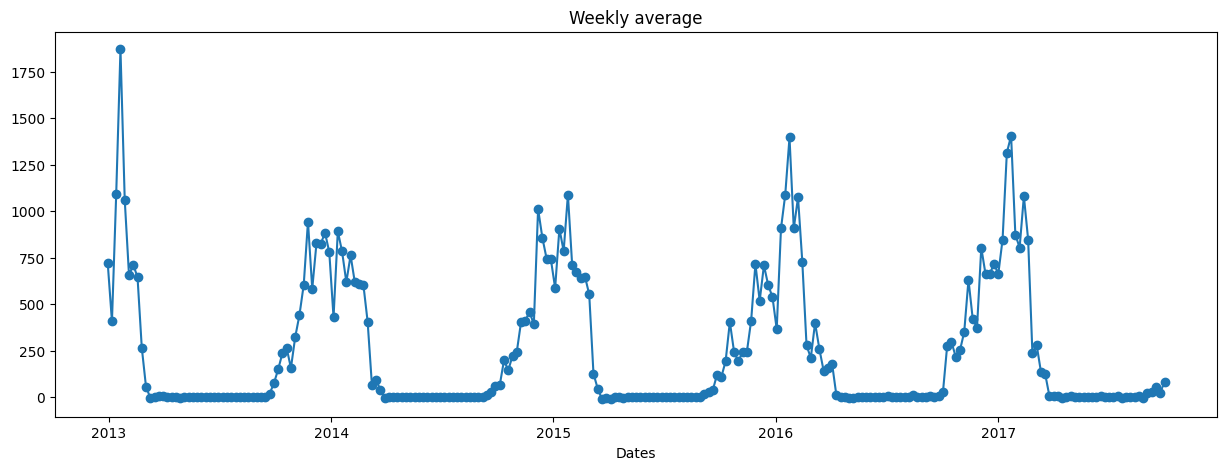

In [22]:
filtered_data = get_data_for_department_business(data_frame=trainig_data_frame, department=117, business=2)
data = get_average(data_frame=filtered_data, meantype=MeanType.WEEK)
data.reset_index(inplace=True)
print(data.head())
plt.figure(figsize=(15, 5))
plt.plot(data["day_id"],data["turnover"], marker="o")
plt.title( "Weekly average")
plt.xlabel("Dates")
plt.show()

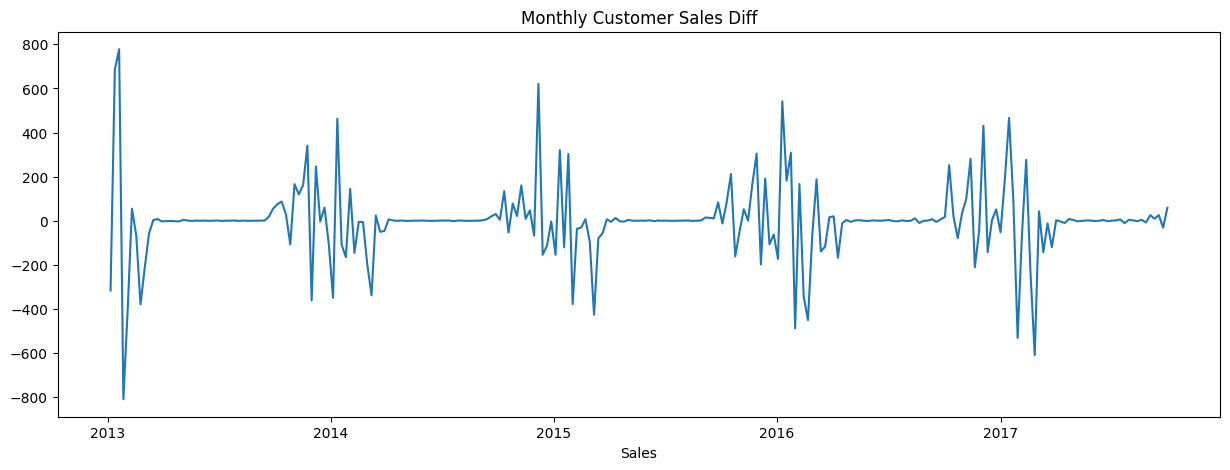

In [23]:
data["turnover_diff"] = data["turnover"].diff()
data = data.dropna()
data.head(10)
plt.figure(figsize=(15, 5))
plt.plot(data["day_id"], data["turnover_diff"])
plt.xlabel("Date")
plt.xlabel("Sales")
plt.title("Monthly Customer Sales Diff")
plt.show()

In [24]:
supverised_data = data.drop(["turnover", "day_id"], axis=1)
print(supverised_data.head())
# to test the model we seperate the model into two part
# 80 % to training data
# 20 % to test data
shifted_columns = [supverised_data]
for i in range(1, predictiing_time):
    shifted_columns.append(
        pd.DataFrame({"week_" + str(i): supverised_data["turnover_diff"].shift(i)})
    )
supverised_data = pd.concat(shifted_columns, axis = 1)
supverised_data = supverised_data.dropna().reset_index(drop=True)
supverised_data.head(100)

   turnover_diff
1    -316.597476
2     685.647309
3     778.006237
4    -809.965148
5    -403.929767


,turnover_diff,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51
0,-105.149390,59.637171,-3.661611,245.887607,-361.640216,340.486141,161.792919,119.499289,165.534427,-107.334552,...,-56.825445,-211.456592,-379.624591,-65.867059,54.607531,-403.929767,-809.965148,778.006237,685.647309,-316.597476
1,-350.147529,-105.149390,59.637171,-3.661611,245.887607,-361.640216,340.486141,161.792919,119.499289,165.534427,...,3.133700,-56.825445,-211.456592,-379.624591,-65.867059,54.607531,-403.929767,-809.965148,778.006237,685.647309
2,463.030646,-350.147529,-105.149390,59.637171,-3.661611,245.887607,-361.640216,340.486141,161.792919,119.499289,...,7.320229,3.133700,-56.825445,-211.456592,-379.624591,-65.867059,54.607531,-403.929767,-809.965148,778.006237
3,-108.448078,463.030646,-350.147529,-105.149390,59.637171,-3.661611,245.887607,-361.640216,340.486141,161.792919,...,-3.304352,7.320229,3.133700,-56.825445,-211.456592,-379.624591,-65.867059,54.607531,-403.929767,-809.965148
4,-165.114630,-108.448078,463.030646,-350.147529,-105.149390,59.637171,-3.661611,245.887607,-361.640216,340.486141,...,-1.909901,-3.304352,7.320229,3.133700,-56.825445,-211.456592,-379.624591,-65.867059,54.607531,-403.929767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-162.129657,211.919605,83.898167,-12.937755,83.161111,10.172688,13.038493,14.278181,0.792879,0.000000,...,-154.746181,-3.563004,-113.116335,-154.608208,621.324447,-67.868993,46.914297,8.306005,160.023519,21.483531
96,-49.523273,-162.129657,211.919605,83.898167,-12.937755,83.161111,10.172688,13.038493,14.278181,0.792879,...,319.942694,-154.746181,-3.563004,-113.116335,-154.608208,621.324447,-67.868993,46.914297,8.306005,160.023519
97,52.014464,-49.523273,-162.129657,211.919605,83.898167,-12.937755,83.161111,10.172688,13.038493,14.278181,...,-120.779200,319.942694,-154.746181,-3.563004,-113.116335,-154.608208,621.324447,-67.868993,46.914297,8.306005
98,0.073453,52.014464,-49.523273,-162.129657,211.919605,83.898167,-12.937755,83.161111,10.172688,13.038493,...,302.813619,-120.779200,319.942694,-154.746181,-3.563004,-113.116335,-154.608208,621.324447,-67.868993,46.914297


In [25]:
train_data = supverised_data[:-look_back_time]
test_data = supverised_data[-look_back_time:]
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (193, 52)
Test Data Shape: (4, 52)


In [26]:
# Noramization of data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)

MinMaxScaler(feature_range=(-1, 1))

In [27]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


In [28]:
X_train, y_train = train_data[:, 1:], train_data[:, 0:1]
X_test, y_test = test_data[:, 1:], test_data[:, 0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print(X_train)
print(y_train)
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

[[ 0.08741274 -0.01543036  0.39001845 ...  1.          0.88367684
  -0.37861894]
 [-0.18032008  0.08741274 -0.01543036 ... -1.          1.
   0.88367684]
 [-0.57837464 -0.18032008  0.08741274 ... -0.48861121 -1.
   1.        ]
 ...
 [-0.01309599 -0.00681241 -0.00316928 ...  0.02876645  0.020742
   0.01953086]
 [-0.00339233 -0.01309599 -0.00681241 ...  0.01341637  0.02876645
   0.020742  ]
 [-0.02281617 -0.00339233 -0.01309599 ...  0.02744006  0.01341637
   0.02876645]]
[-1.80320078e-01 -5.78374636e-01  7.42816132e-01 -1.85679538e-01
 -2.77747091e-01  2.24572137e-01 -2.46375677e-01 -1.85351274e-02
 -1.96134546e-02 -3.32825926e-01 -5.59715759e-01  2.86012442e-02
 -9.11994939e-02 -8.49308911e-02  8.07908711e-04 -7.60134365e-03
 -1.04343741e-02 -8.32160564e-03 -1.08474276e-02 -1.06171503e-02
 -8.85909147e-03 -9.63872990e-03 -7.83936571e-03 -1.01751831e-02
 -1.08913146e-02 -9.48125326e-03 -8.76357286e-03 -8.70677800e-03
 -8.10268730e-03 -1.23519749e-02 -9.12241306e-03 -8.04589245e-03
 -1.06

In [29]:
sales_dates = data["day_id"][-look_back_time:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)
predict_df

,day_id
0,2017-09-10
1,2017-09-17
2,2017-09-24
3,2017-10-01


In [30]:
active_turnover = data["turnover"][-predictiing_time:].to_list()
print(active_turnover)

[276.82243801451256, 296.7537068221077, 217.8917232130632, 251.54723746275863, 350.8513065128239, 631.1456190188013, 419.960880764101, 373.2404211304478, 803.7711111999137, 661.5040398596535, 664.4629569756393, 715.5971506147438, 662.9588699055114, 847.6310807877497, 1313.5650314858715, 1405.0988830058968, 873.1725957016282, 804.3303430073964, 1080.54534219102, 846.6122548534944, 236.9590188257029, 279.8291548777606, 136.95232355673434, 124.7569199219938, 4.810981228537022, 6.698319694431947, 3.781986102174457, -6.897254546810722, 0.8265646459756124, 4.28567889874168, 1.523789879835856, 0.5399205434496598, 1.7144622318486846, 2.221968475456164, 1.0776165761258367, 0.5071884563541244, 3.6399351999249, 1.6130880980285305, 1.6277063116828474, 2.9128379642493125, 8.93013960652083, -2.505116918195214, 1.3798322540661705, 3.022474566656689, 0.7976460059203334, 4.545311084732481, -3.6621803076597295, 21.449686239683164, 30.49359368290498, 55.861278969198416, 24.057130653458596, 82.44386492506

In [31]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

In [32]:
linreg_pred = linreg_pred.reshape(-1, 1)
linreg_pred_test_set = np.concatenate([linreg_pred, X_test], axis=1)
linreg_pred_test_set = scaler.inverse_transform(linreg_pred_test_set)

In [33]:
result_list = []
for index in range(0, len(linreg_pred_test_set)):
    result_list.append(linreg_pred_test_set[index][0] + active_turnover[index])
linreg_pred_series = pd.Series(result_list, name="linreg_pred")
predict_df = predict_df.merge(linreg_pred_series, left_index=True, right_index=True)

In [34]:
linreg_rmse = np.sqrt(
    mean_squared_error(predict_df["linreg_pred"], data["turnover"][-look_back_time:])
)
linreg_mae = mean_absolute_error(
    predict_df["linreg_pred"], data["turnover"][-look_back_time:]
)
linreg_r2 = r2_score(predict_df["linreg_pred"], data["turnover"][-look_back_time:])
print("Linear Regression RMSE: ", linreg_rmse)
print("Linear Regression MAE: ", linreg_mae)
print("Linear Regression R2 Score: ", linreg_r2)

Linear Regression RMSE:  221.3881377943597
Linear Regression MAE:  220.87026591823354
Linear Regression R2 Score:  -466.45906662523623


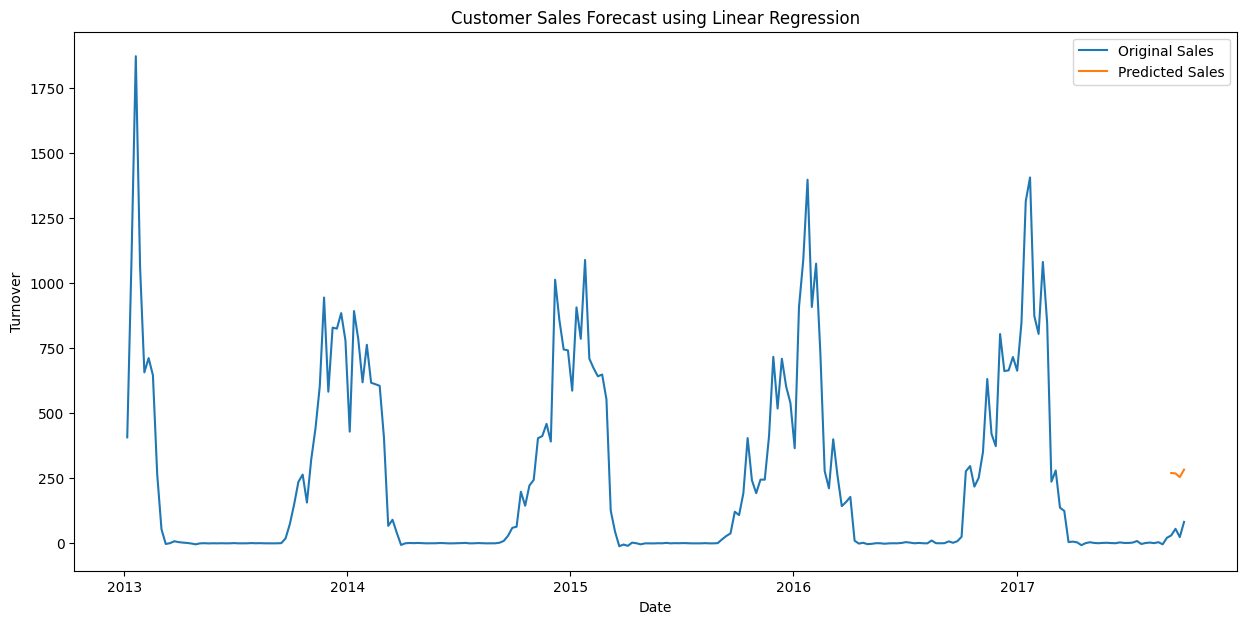

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(data["day_id"], data["turnover"])
plt.plot(predict_df["day_id"], predict_df["linreg_pred"])
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Turnover")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()